# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a litle hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


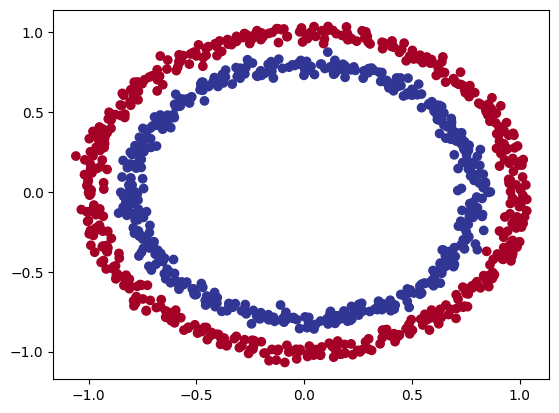

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps in modelling

In [9]:
import tensorflow as tf

# Set the seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history = model_1.fit(X, y, epochs=5)

Metal device set to: Apple M1 Max
Epoch 1/5


2023-08-31 14:38:30.809423: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 8ms/step - loss: 4.0385 - accuracy: 0.4650
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 1.3767 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7297 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7049 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5050


In [10]:
# Let's try and improve our model
history = model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
# Set the random seed
tf.random.set_seed(42)

# # Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[2]),
    tf.keras.layers.Dense(1)
])

# # Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# # Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [12]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932203769683838, 0.5]

#Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units.
2. Compiling a model - here we might to choose a different optimization function such as Adam.
3. Fitting a model - Change the number of epochs.


In [13]:
# Set the seed
tf.random.set_seed(42)

# # Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[2]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# # Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# # fit the model
model_3.fit(X, y, epochs=100, verbose=0)


In [14]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6975 - accuracy: 0.5060


[0.6975266337394714, 0.5059999823570251]

In [15]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

from abc import abstractproperty
To visualize our model's predictions let's create a function plot_decision_boundary(), this function will:

* Take in a trained mode, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions abstractproperty
* Plot the predications as well as a line between zones (where each unique class falls)


In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting.
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


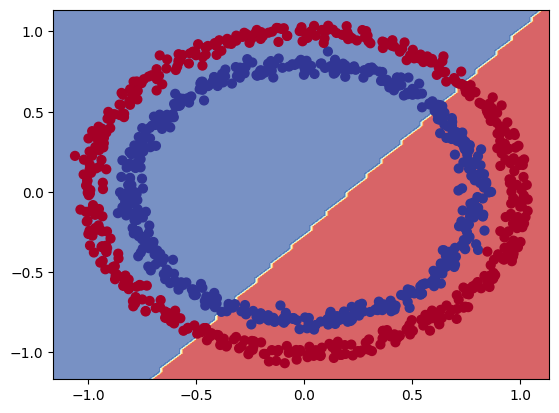

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [20]:
# Let's see if our model can be used for a regression problem.

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/Users/sodeso/miniforge3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/sodeso/miniforge3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sodeso/miniforge3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/sodeso/miniforge3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/sodeso/miniforge3/envs/ml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/sodeso/miniforge3/envs/ml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait, we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.



In [21]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 27ms/step - loss: 488.5323 - mae: 488.5323
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 389.1337 - mae: 389.1337
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 293.1668 - mae: 293.1668
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 193.3697 - mae: 193.3697
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 89.5136 - mae: 89.5136
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 57.9016 - mae: 57.9016
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 77.5833 - mae: 77.5833
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 59.8306 - mae: 59.8306
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 44.4025 - mae: 44.4025
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 51.0496 - mae: 51.0496
Epoch 11/100
5/5 [==============================] 

2/2 [==============================] - 0s 13ms/step


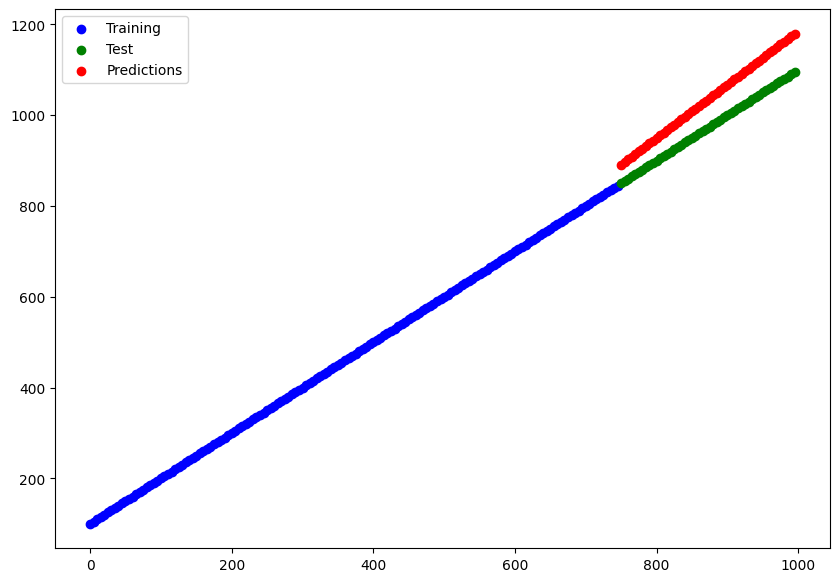

In [22]:
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

#The missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

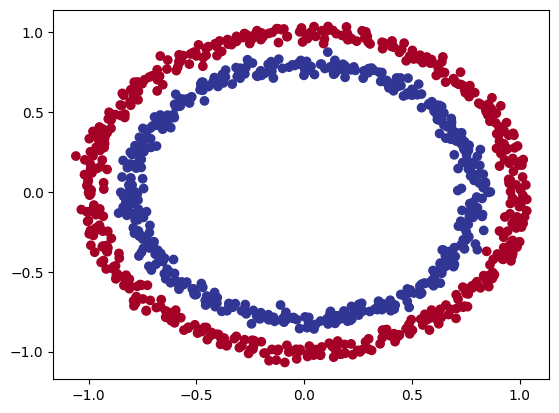

In [24]:
# Check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


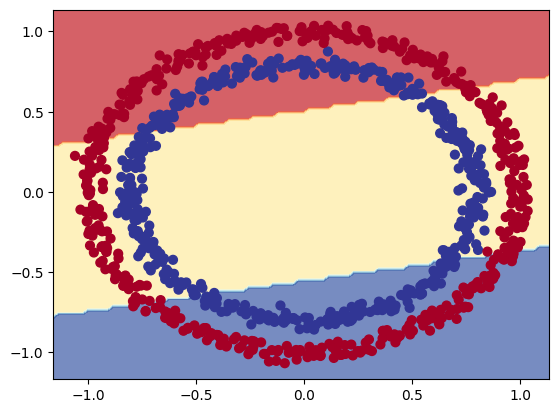

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

# Let's try build our first neural network with a non-linear activation function.

In [26]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(x=X, y=y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 4.4043 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.3215 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2875 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2711 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2644 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2501 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2234 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2011 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1848 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1825 - accuracy: 0.4760
Epoch 11/

In [27]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(x=X, y=y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 11ms/step - loss: 1.1702 - accuracy: 0.4540
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 0.9895 - accuracy: 0.4610
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 0.8982 - accuracy: 0.4570
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 0.8355 - accuracy: 0.4560
Epoch 5/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7893 - accuracy: 0.4640
Epoch 6/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7499 - accuracy: 0.4380
Epoch 7/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7213 - accuracy: 0.4410
Epoch 8/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.4900
Epoch 9/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5390
Epoch 10/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6832 - accuracy: 0.5380
Epoch 11

In [28]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.9820


[0.05418720468878746, 0.9819999933242798]

313/313 [==============================] - 1s 2ms/step
doing binary classification


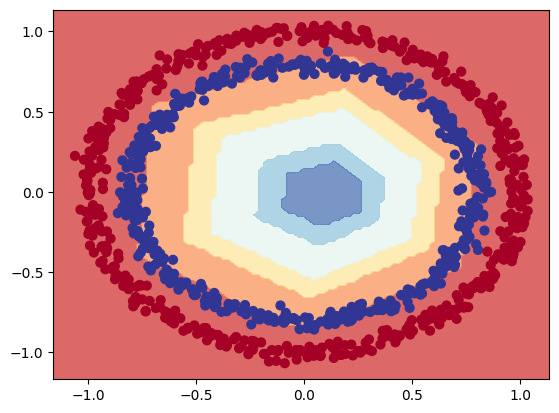

In [29]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [30]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(x=X, y=y, epochs=128)

Epoch 1/128
32/32 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.5050
Epoch 2/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5050
Epoch 3/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.5060
Epoch 4/128
32/32 [==============================] - 0s 8ms/step - loss: 0.6911 - accuracy: 0.5050
Epoch 5/128
32/32 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5050
Epoch 6/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5060
Epoch 7/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5120
Epoch 8/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.5100
Epoch 9/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.5120
Epoch 10/128
32/32 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5120
Epoch 11

In [31]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 7ms/step - loss: 0.3540 - accuracy: 0.9010


[0.35399627685546875, 0.9010000228881836]

313/313 [==============================] - 1s 2ms/step
doing binary classification


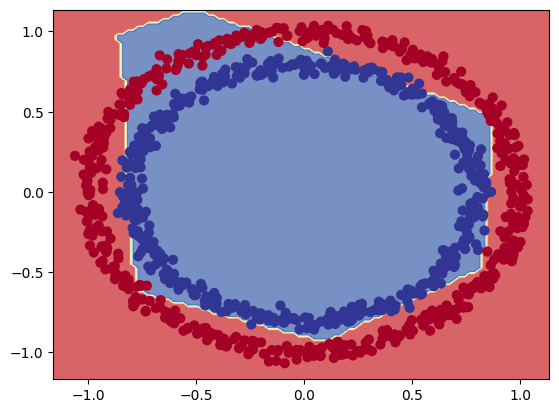

In [32]:
plot_decision_boundary(model_7, X, y)

In [33]:
# Create a toy tensor (simnilar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

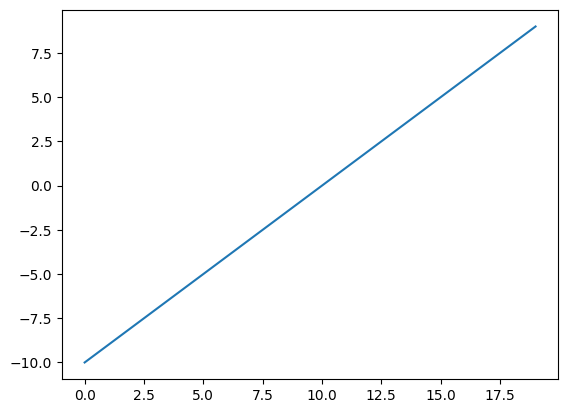

In [34]:
# Visualize our toy tensor;
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/ / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use our sigmoid function on our toy tnesor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

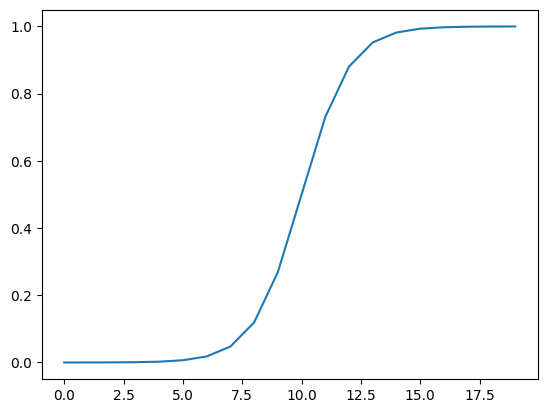

In [36]:
#Plot our toy tensor transoformed by sigmoid.
plt.plot(sigmoid(A))

In [37]:
# Let's recreate the ruly function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

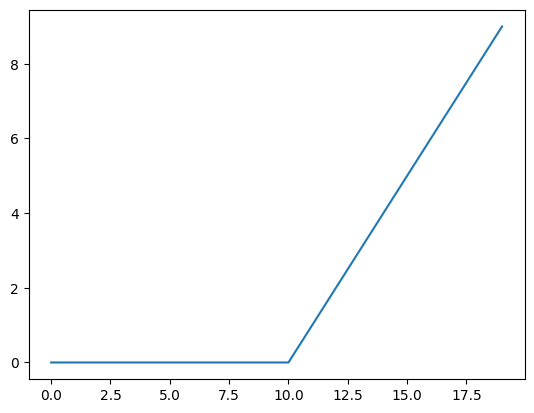

In [38]:
#Plot our toy tensor transoformed by relu.
plt.plot(relu(A))

# Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically as sin.

So let's create a training and test set.

In [39]:
len(X)

1000

In [40]:
# Split into train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [41]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(x=X_train, y=y_train, epochs=25, verbose=0)

model_8.evaluate(x=X_test, y=y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.0560 - accuracy: 0.9850


[0.05603717640042305, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


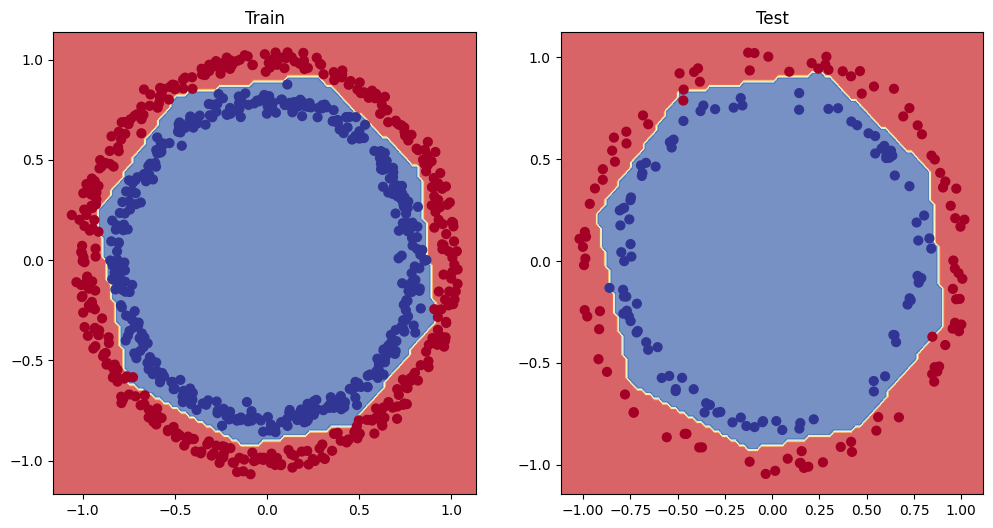

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test);
plt.show();

# Plot the loss (or training) curves

In [43]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692969,0.49875
1,0.681986,0.56875
2,0.670787,0.56875
3,0.658909,0.61625
4,0.641936,0.69125
5,0.620396,0.68875
6,0.594612,0.78375
7,0.567398,0.77000
8,0.530664,0.81500
9,0.485454,0.87750


Text(0.5, 1.0, 'Loss curves')

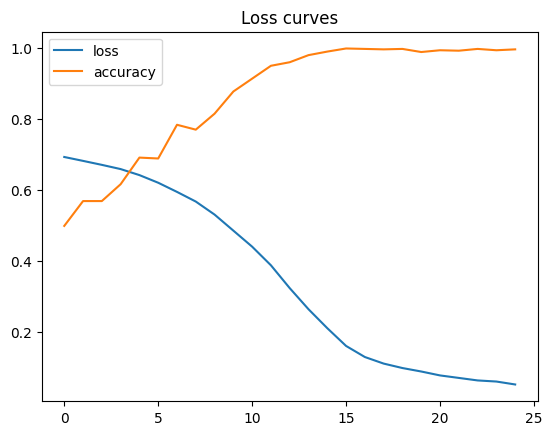

In [44]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Loss curves")

# Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to follow these steps:

* A learning rate callback - you can think of a callback as an extra piece of functionality, you can add to your model while it's training.
* Another model (we could use the same on as above, but we're practicing building models here)
* A modified loss curve plot.

In [45]:
# Set random seed
tf.random.set_seed(42)

# create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))



# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 0.7112 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7107 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7101 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7095 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7089 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7084 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7076 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7070 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss:

<Axes: xlabel='epochs'>

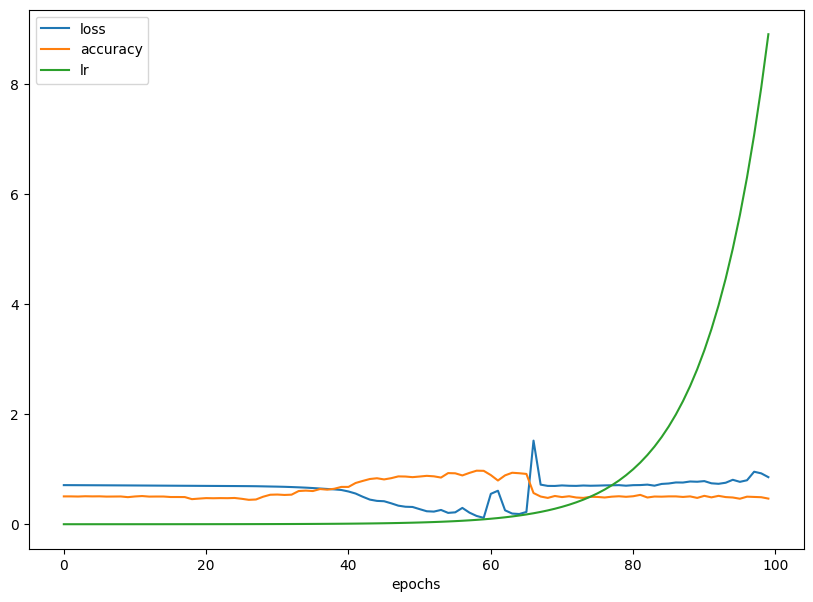

In [46]:
# Checkout the histroy.
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate v.s. loss')

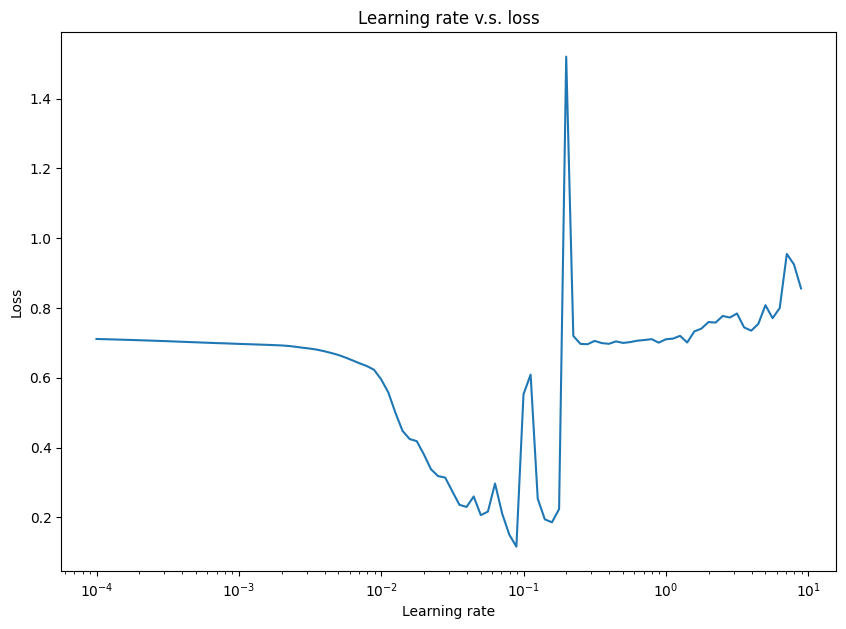

In [47]:
# Plot the learning rate versus te loss
lrs = 1e-4 * ( 10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate v.s. loss")

In [48]:
# Example of ther typical learning rate values are:

10 ** 0, 10 ** -1, 10 ** -2, 10 ** -3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [55]:
# Set the seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=25, verbose=0)

# Evaluate the model
model_10.evaluate(X_test, y_test);

7/7 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.9850


<Axes: >

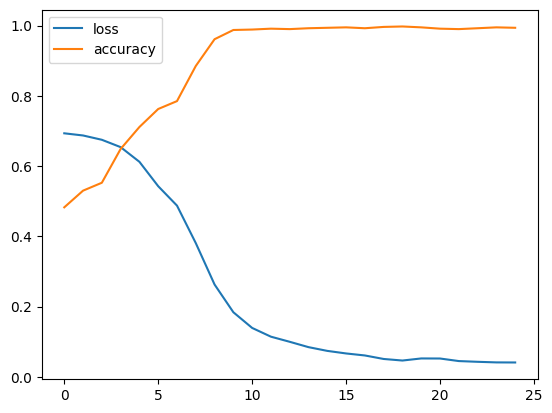

In [56]:
pd.DataFrame(history_10.history).plot()

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


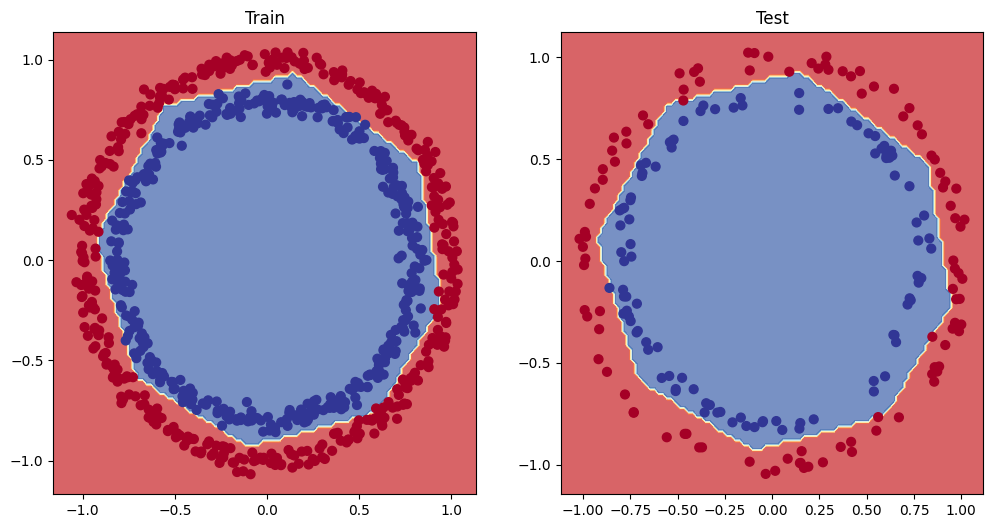

In [57]:
# Plot the decision boundaries for the training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you sould be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification repoort (from scikit-learn)

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.0372 - accuracy: 0.9850
Model loss on the test set: 0.037229400128126144
Model accuracy on the test set: 98.50%


How about a confusion matrix?

In [59]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))



7/7 [==============================] - 0s 4ms/step


array([[99,  2],
       [ 1, 98]])

How about we prettify our confusion matrix?

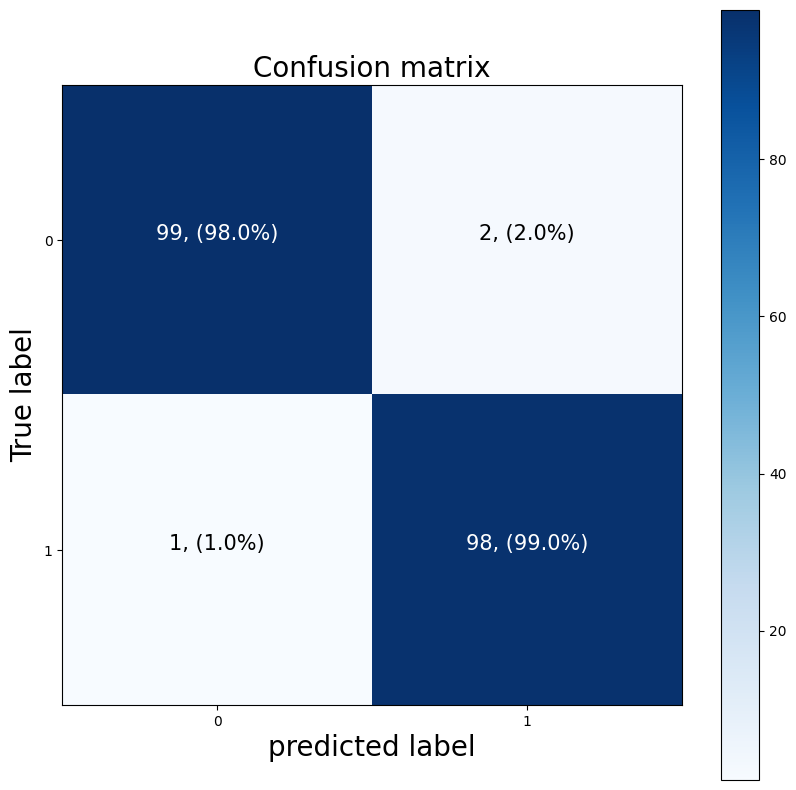

In [60]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_classification_confusion_matrix.

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion matrix",
       xlabel="predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20);
ax.xaxis.label.set_size(20);
ax.title.set_size(20);

# Set treshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]}, ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as a multiclass classification.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

Fashion mnist dataset.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [62]:
# Show the first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_data[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [63]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

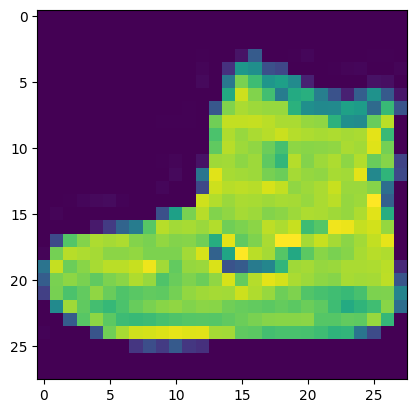

In [64]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [65]:
# Check out samples label
train_labels[7]

2

In [66]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

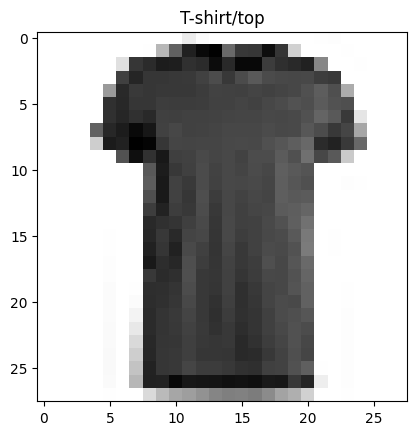

In [67]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

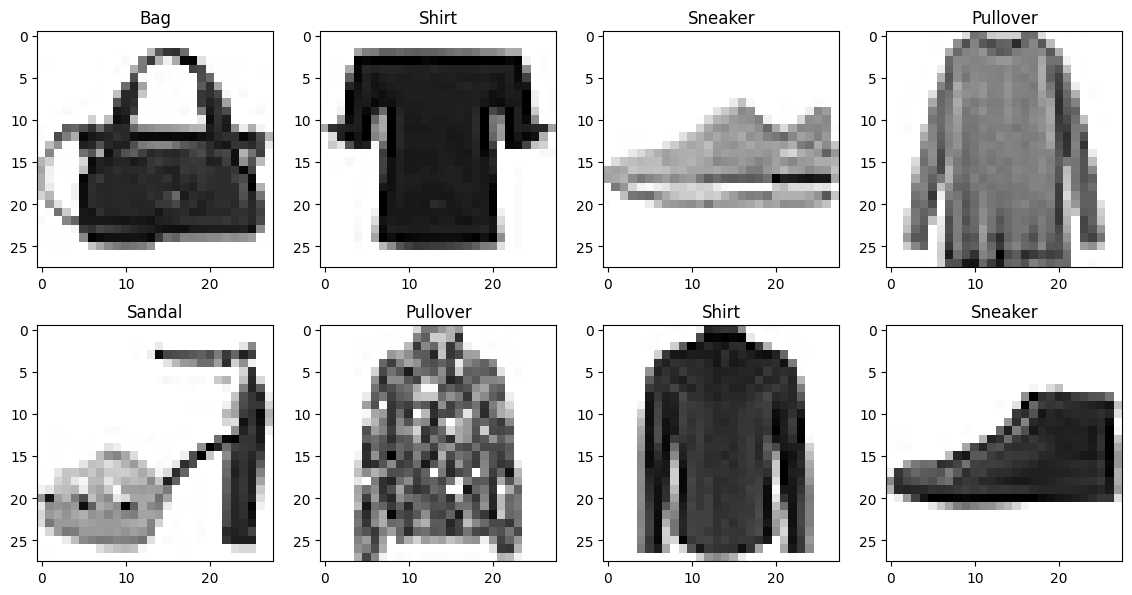

In [68]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(14, 7))
for i in range(8):
  ax = plt.subplot(2, 4, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis=(False)

## Building a multi-class classification model

For our multyi-class classification model, we can use a similar architecture tyo our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.Cate4goricalCrossentropy()
  * If your labels are on-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output activation = softmax (not sigmoid)


In [69]:
# Our data needs to be flattened from (28, 28) to (None, 784)

flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [70]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [71]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, verbose=1,
                                   validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 2.2119 - accuracy: 0.1577 - val_loss: 2.0172 - val_accuracy: 0.2007
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.8612 - accuracy: 0.2392 - val_loss: 1.7238 - val_accuracy: 0.2798
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.6661 - accuracy: 0.2836 - val_loss: 1.6057 - val_accuracy: 0.3051
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.5906 - accuracy: 0.3123 - val_loss: 1.5632 - val_accuracy: 0.3443
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.4344 - accuracy: 0.4459 - val_loss: 1.3472 - val_accuracy: 0.4866
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.3352 - accuracy: 0.4718 - val_loss: 1.3716 - val_accuracy: 0.4413
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2666 - accuracy: 0.4963 - val_loss: 1.3064 -

In [72]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [73]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks perfere data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [74]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data.
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [75]:
# Now our data is normalized, let's buikd a model to find patterns in it.

# set random seed
tf.random.set_seed(42)

# build the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, verbose=1,
             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0556 - accuracy: 0.5922 - val_loss: 0.7599 - val_accuracy: 0.7123
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6733 - accuracy: 0.7459 - val_loss: 0.6707 - val_accuracy: 0.7602
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6162 - accuracy: 0.7728 - val_loss: 0.6304 - val_accuracy: 0.7804
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5852 - accuracy: 0.7896 - val_loss: 0.6015 - val_accuracy: 0.7933
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5624 - accuracy: 0.7992 - val_loss: 0.5966 - val_accuracy: 0.7910
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5473 - accuracy: 0.8058 - val_loss: 0.5813 - val_accuracy: 0.7979
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5379 - accuracy: 0.8098 - val_loss: 0.5681 - val_ac

<Axes: title={'center': 'Normalized'}>

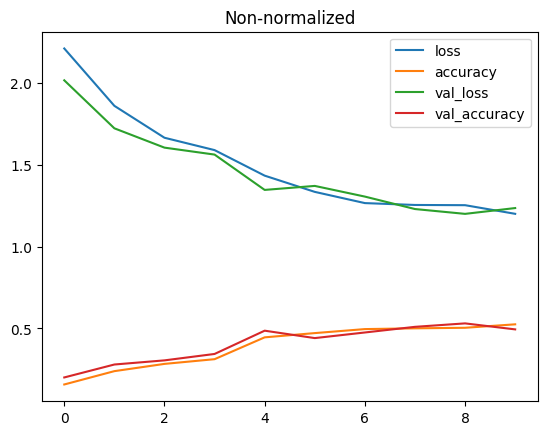

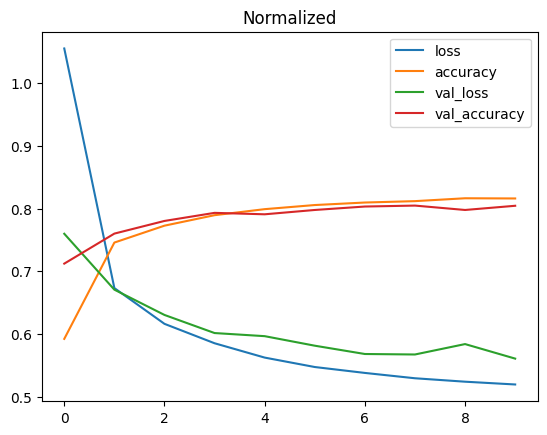

In [76]:
import pandas as pd

# Plot non-normalized data loss curves.
non_norm_history_pd = pd.DataFrame(non_norm_history.history)
norm_history_pd = pd.DataFrame(norm_history.history)

non_norm_history_pd.plot(title="Non-normalized")
norm_history_pd.plot(title="Normalized")


The same model with even *slightly* different data can product *dramatically* different reuslts. So when you're comparing models, it's omportant to make sure you're comparing them on the same criteria (e.g. same architecture but different data, or same data but different architecture.)

## Finding the ideal learning rate

In [77]:
tf.random.set_seed(42)

# Build the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a callback to adjust the learning rate.
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
norm_history_13 = model_13.fit(train_data_norm, train_labels, epochs=40, verbose=1, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3955 - accuracy: 0.4755 - val_loss: 0.9892 - val_accuracy: 0.6362 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8798 - accuracy: 0.6770 - val_loss: 0.8329 - val_accuracy: 0.6861 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7624 - accuracy: 0.7099 - val_loss: 0.7486 - val_accuracy: 0.7161 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7067 - accuracy: 0.7333 - val_loss: 0.7171 - val_accuracy: 0.7361 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6780 - accuracy: 0.7459 - val_loss: 0.6843 - val_accuracy: 0.7538 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6609 - accuracy: 0.7537 - val_loss: 0.7007 - val_accuracy: 0.7470 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

Text(0.5, 1.0, 'Finding the ideal learning rate')

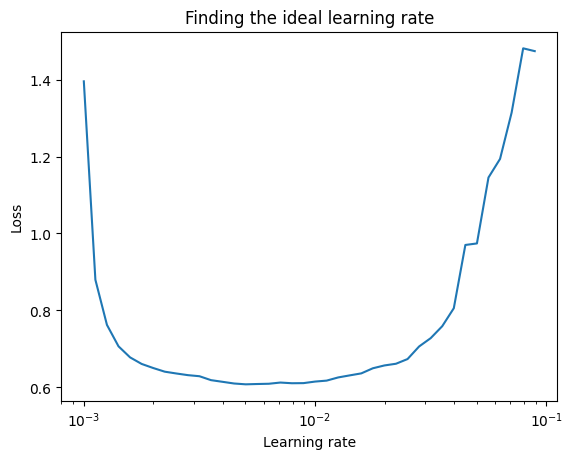

In [78]:
# Plot the learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, norm_history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [79]:
# Let's refit the model with the ideal learning rate.

# Set random seed
tf.random.set_seed(42)

# Build the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compuile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
                 metrics=["accuracy"])

# fit the model
model_14_histroy = model_14.fit(train_data_norm, train_labels, epochs=20, verbose=1, validation_data=(test_data_norm, test_labels))



Epoch 1/20
1875/1875 [==============================] - 12s 7ms/step - loss: 1.0794 - accuracy: 0.5964 - val_loss: 0.8510 - val_accuracy: 0.6696
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7395 - accuracy: 0.7160 - val_loss: 0.7186 - val_accuracy: 0.7194
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6610 - accuracy: 0.7472 - val_loss: 0.6748 - val_accuracy: 0.7405
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6250 - accuracy: 0.7668 - val_loss: 0.6460 - val_accuracy: 0.7619
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6070 - accuracy: 0.7756 - val_loss: 0.6383 - val_accuracy: 0.7691
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5955 - accuracy: 0.7806 - val_loss: 0.6478 - val_accuracy: 0.7643
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5880 - accuracy: 0.7862 - val_loss: 0.6334 - val_ac

# Evaluating our multi-class classification model

To evaluate our multi-class evaluation model we could:
* Evaluate its performance using other classification metrics (confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [80]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_classification_confusion_matrix.
import itertools
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion matrix",
        xlabel="predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)


  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size);
  ax.xaxis.label.set_size(text_size);
  ax.title.set_size(text_size);

  # Set treshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}, ({cm_norm[i, j]*100:.1f}%)",
      horizontalalignment="center",
      color="white" if cm[i, j] > threshold else "black",
      size=text_size)

In [81]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [82]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions 
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.3077532e-07, 1.1843877e-03, 6.7344251e-07, 5.7120242e-06,
        1.2435921e-04, 1.1807000e-01, 1.4672777e-05, 5.7678562e-02,
        2.8189241e-03, 8.2010233e-01],
       [1.4321940e-04, 7.9067242e-05, 8.0010957e-01, 3.5788101e-08,
        4.3518066e-02, 1.5157092e-36, 1.5615006e-01, 0.0000000e+00,
        3.8420411e-10, 5.9998033e-28],
       [7.0645051e-10, 9.9994516e-01, 2.3093447e-08, 4.9650600e-05,
        5.0946414e-06, 1.5407864e-27, 2.2771427e-09, 5.8420616e-11,
        1.5603321e-12, 1.5412973e-09],
       [6.0730129e-11, 9.9998546e-01, 8.7264135e-10, 1.4283892e-05,
        2.7676262e-07, 1.3611952e-27, 1.1598426e-10, 7.2549294e-10,
        5.0817579e-14, 1.7388142e-09],
       [1.8331069e-01, 3.3661616e-03, 1.6356637e-01, 2.7181862e-02,
        3.6665991e-02, 9.1574265e-15, 5.8516246e-01, 1.5491180e-17,
        7.4642431e-04, 5.2734981e-13]], dtype=float32)

In [83]:
y_probs[0]

array([3.3077532e-07, 1.1843877e-03, 6.7344251e-07, 5.7120242e-06,
       1.2435921e-04, 1.1807000e-01, 1.4672777e-05, 5.7678562e-02,
       2.8189241e-03, 8.2010233e-01], dtype=float32)

In [84]:
tf.argmax(y_probs[0]), class_names[9]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

In [85]:
# Convert all of the prediction probabilities into integers.
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [86]:
model_14.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.5951 - accuracy: 0.7924


[0.5951249599456787, 0.7924000024795532]

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[699,   0,   3,  96,   7,   2, 155,   2,  35,   1],
       [  3, 943,   4,  30,  11,   0,   5,   2,   2,   0],
       [ 14,   1, 423,  13, 268,   0, 267,   0,  14,   0],
       [ 42,  17,  13, 829,  38,   1,  47,   1,  12,   0],
       [  0,   1,  44,  25, 796,   0, 110,   0,  24,   0],
       [  0,   0,   0,   1,   0, 894,   0,  47,  14,  44],
       [118,   1,  52,  58, 150,   0, 554,   0,  66,   1],
       [  0,   0,   0,   0,   0,  35,   0, 907,   1,  57],
       [  2,   1,   0,   6,   4,   8,  33,   2, 942,   2],
       [  0,   0,   0,   0,   1,  20,   0,  39,   3, 937]])

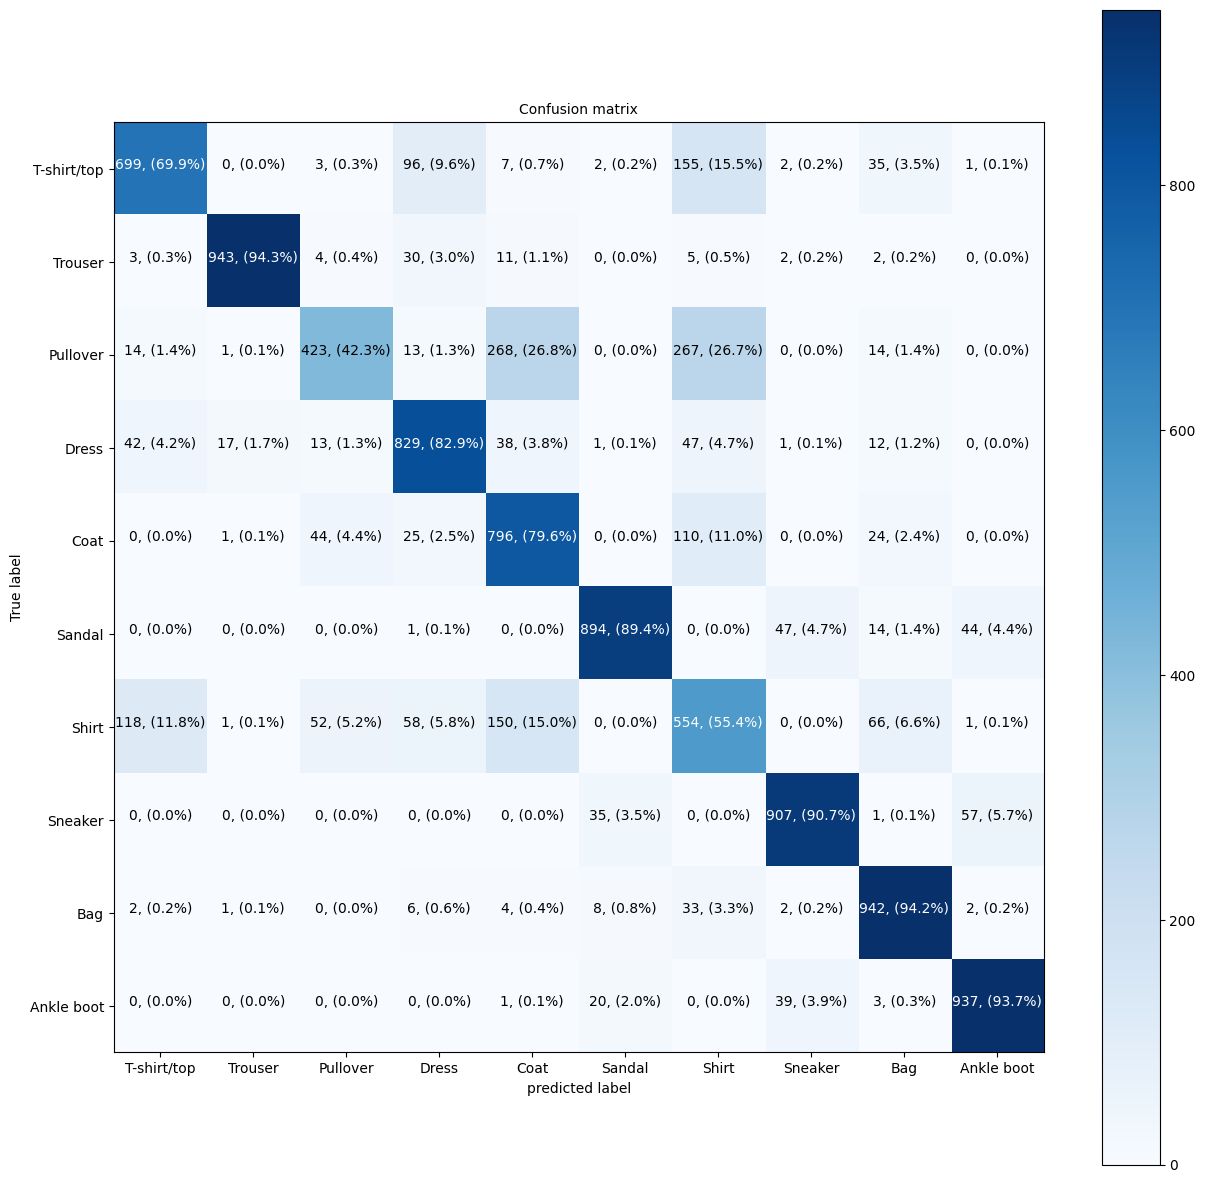

In [88]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little funcion for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label.

In [89]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))

  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction / true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                   100 * tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 235ms/step


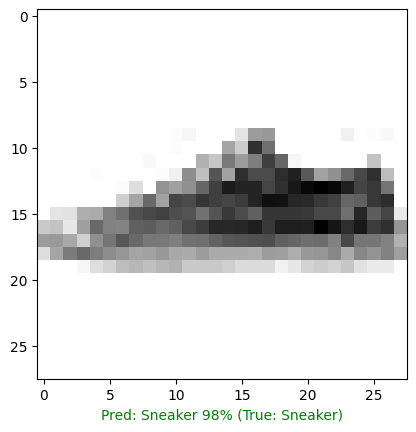

In [90]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

## What patterns is our model learning?



In [91]:
# Finst the layers of our most recent model.
model_14.layers

In [92]:
# Extract a particular layer
model_14.layers[1]

In [93]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.07292229, -0.20861241, -1.0134441 ,  1.0862815 ],
        [ 0.06796792,  0.42505106, -1.0580066 ,  1.9679201 ],
        [ 0.04481725, -0.68036413, -0.20547695,  2.4204042 ],
        ...,
        [ 0.06392228,  0.27722606, -0.5486552 ,  0.08135918],
        [ 0.07664982,  1.5859132 , -0.33732155, -0.8176295 ],
        [-0.01778312,  0.30807194, -0.48701957,  0.32327226]],
       dtype=float32),
 (784, 4))

In [94]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


 Now let's check out the bias vector...

In [95]:
# Bias and biases shapes.
biases, biases.shape

(array([-0.02969144,  2.01417   ,  0.40688178,  2.2658002 ], dtype=float32),
 (4,))

In [96]:
# Let's check out another way of viewing our deep learning models.
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
